In [68]:
import json 
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

#df = pd.read_json("data.json")
df = pd.read_csv('data.csv', index_col=0)

In [69]:
df

,hotel_name,hotel_city,hotel_price,Personel,Udogodnienia,Czystość,Komfort,Stosunek jakości do ceny,Lokalizacja,Bezpłatne WiFi,...,Usługi:prasa do spodni,Usługi:usługi konsjerża,Rekreacja:solarium\nDodatkowa opłata,Basen – odkryty (dla dzieci):ręczniki kąpielowe/plażowe,Basen – odkryty (dla dzieci):zabawki do wody,Basen – odkryty (dla dzieci):basen bez krawędzi,Rekreacja:wieczory tematyczne z kolacją\nPoza obiektem,Rekreacja:kasyno,Okolica:prywatna plaża\nDodatkowa opłata,Odkryty basen:Basen na dachu
0,Pokoje Gościnne Przy Molo,Gdynia,3 524 zł,"9,2","8,4","8,8","8,4","8,3","9,6","8,7",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aparthotel Square - By The Sea,Gdynia,3 263,"9,4","9,3","9,6","9,7","9,3","9,5","9,2",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Villa Magna,Gdynia,2 457 zł,"9,5","9,0","9,0","8,9","9,0","8,4","8,7",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apartament Gdynia Witomino z widokiem na morze,Gdynia,2 028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Apartamenty z tarasami - Moja Gdynia,Gdynia,2 443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847,Skarb Morza,Międzyzdroje,2 478 zł,"9,0","7,6","8,4","8,0","7,8","9,3","6,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1848,APARTAMENT RODZINNY MIĘDZYZDROJE,Międzyzdroje,5 180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1849,Rent like home - Willa Perła 8,Międzyzdroje,8 755 zł,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850,Margaret V.I.P.,Międzyzdroje,9 044,"9,2","9,2","9,2","9,2","9,2",10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [70]:
col_with_comma = ['Personel', 'Udogodnienia', 'Czystość', 'Komfort', 'Stosunek jakości do ceny', 'Lokalizacja', 'Bezpłatne WiFi']
for col in col_with_comma:
    df[col] = df[col].str.replace(",",".").astype(float)
df['hotel_price'] = df['hotel_price'].str.replace('zł','').str.replace(' ','').astype(int)
df.dtypes

hotel_name                                                 object
hotel_city                                                 object
hotel_price                                                 int32
Personel                                                  float64
Udogodnienia                                              float64
                                                           ...   
Basen – odkryty (dla dzieci):basen bez krawędzi           float64
Rekreacja:wieczory tematyczne z kolacją\nPoza obiektem    float64
Rekreacja:kasyno                                          float64
Okolica:prywatna plaża\nDodatkowa opłata                  float64
Odkryty basen:Basen na dachu                              float64
Length: 776, dtype: object

In [71]:
print(f'before: {df.shape[0]}')
df = df.dropna(subset=['Personel'])
df = df.reset_index(drop=True)
print(f'after: {df.shape[0]}')

before: 1852
after: 1640


In [72]:
number_of_duplicated_value =  df.duplicated().value_counts()
number_of_duplicated_value

False    1490
True      150
dtype: int64

In [73]:
df.drop_duplicates(inplace=True)
df.shape[0]

1490

In [74]:
print(f'before: {df.shape[0]}')
max_value = df['hotel_price'].quantile(0.995)
print(max_value)
df = df[df['hotel_price'] <= max_value]
print(f'after: {df.shape[0]}')

before: 1490
8895.385000000007
after: 1482


In [75]:
df.to_csv('data_outliners.csv')

In [76]:
df_copy = df.copy()

In [77]:
df.head(5)

,hotel_name,hotel_city,hotel_price,Personel,Udogodnienia,Czystość,Komfort,Stosunek jakości do ceny,Lokalizacja,Bezpłatne WiFi,...,Usługi:prasa do spodni,Usługi:usługi konsjerża,Rekreacja:solarium\nDodatkowa opłata,Basen – odkryty (dla dzieci):ręczniki kąpielowe/plażowe,Basen – odkryty (dla dzieci):zabawki do wody,Basen – odkryty (dla dzieci):basen bez krawędzi,Rekreacja:wieczory tematyczne z kolacją\nPoza obiektem,Rekreacja:kasyno,Okolica:prywatna plaża\nDodatkowa opłata,Odkryty basen:Basen na dachu
0,Pokoje Gościnne Przy Molo,Gdynia,3524,9.2,8.4,8.8,8.4,8.3,9.6,8.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aparthotel Square - By The Sea,Gdynia,3263,9.4,9.3,9.6,9.7,9.3,9.5,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Villa Magna,Gdynia,2457,9.5,9.0,9.0,8.9,9.0,8.4,8.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apartamenty Andrzejczyk - Świętojańska 96,Gdynia,2017,9.4,8.7,8.8,8.9,8.7,9.5,9.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Redłowska Kaskada D39,Gdynia,2059,9.2,9.6,10.0,9.6,9.6,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
print(len(df.columns))
cattegory = []
for col in df.columns:
    if(col.split(':')[0] not in cattegory):
        print(col.split(':')[0])
        cattegory.append(col.split(':')[0])
print(len(cattegory))

776
hotel_name
hotel_city
hotel_price
Personel
Udogodnienia
Czystość
Komfort
Stosunek jakości do ceny
Lokalizacja
Bezpłatne WiFi
Łazienka
Sypialnia
Okolica
Kuchnia
Udogodnienia w pokoju
Salon
Media/Technologia
Parking
Bezpieczeństwo
Ogólne
Języki
Usługi recepcji
Udogodnienia dla niepełnosprawnych
Różne
Posiłki i napoje
Okolica i widok
Rekreacja
Cechy budynku
Sklepy
Transport
Usługi dla rodzin i oferta rozrywkowa
Usługi sprzątania
Zaplecze biznesowe
Zaplecze odnowy biologicznej
Widok
Kryty basen
Centrum wellness
Usługi dodatkowe
Usługi
Basen i odnowa biologiczna
Pomieszczenia ogólnodostępne
2 basenów
Odkryty basen
3 basenów
Basen – odkryty (dla dzieci)
45


In [79]:
df.isna().sum()
how_many_drop = 0
percent_of_hotels = df.shape[0] * 0.995
for col in df.columns:
    if(df[col].isna().sum() > percent_of_hotels):
        df = df.drop(columns=col)
        how_many_drop = how_many_drop + 1
print(how_many_drop)

291


In [80]:
df.shape[1]

485

In [81]:
df = df.fillna(0)

In [82]:
df.to_csv('data_cleaned.csv')

In [83]:
df.columns

Index(['hotel_name', 'hotel_city', 'hotel_price', 'Personel', 'Udogodnienia',
       'Czystość', 'Komfort', 'Stosunek jakości do ceny', 'Lokalizacja',
       'Bezpłatne WiFi',
       ...
       'Odkryty basen:płotek wokół basenu',
       'Odkryty basen:basen z podgrzewaną wodą',
       'Usługi dla rodzin i oferta rozrywkowa:wózki dziecięce',
       'Odkryty basen:brodzik', '3 basenów:Sezonowy',
       'Rekreacja:wieczór filmowy\nPoza obiektem\nDodatkowa opłata',
       'Usługi:wymiana walut', 'Widok:widok na jezioro',
       'Rekreacja:bezpłatne rowery', 'Usługi:wózki dziecięce'],
      dtype='object', length=485)

In [84]:
df_group_by_price = df.groupby('hotel_city')['hotel_price'].mean()
df_group_by_price.sort_values()

hotel_city
Władysławowo    2182.472000
Łeba            2329.854651
Mielno          2755.818750
Kołobrzeg       3128.741667
Międzyzdroje    3574.690217
Gdynia          3598.728395
Świnoujście     3616.010909
Name: hotel_price, dtype: float64

In [85]:
fig = px.bar(df_group_by_price)
fig.show()

In [86]:
from sklearn.model_selection import train_test_split

df_without_name = df.drop(columns=['hotel_name','hotel_city'])
y = df_without_name['hotel_price']
X = df_without_name.drop(columns=['hotel_price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(random_state=0,max_depth=4)
DTR.fit(X_train, y_train)
predictons = DTR.predict(X_test)

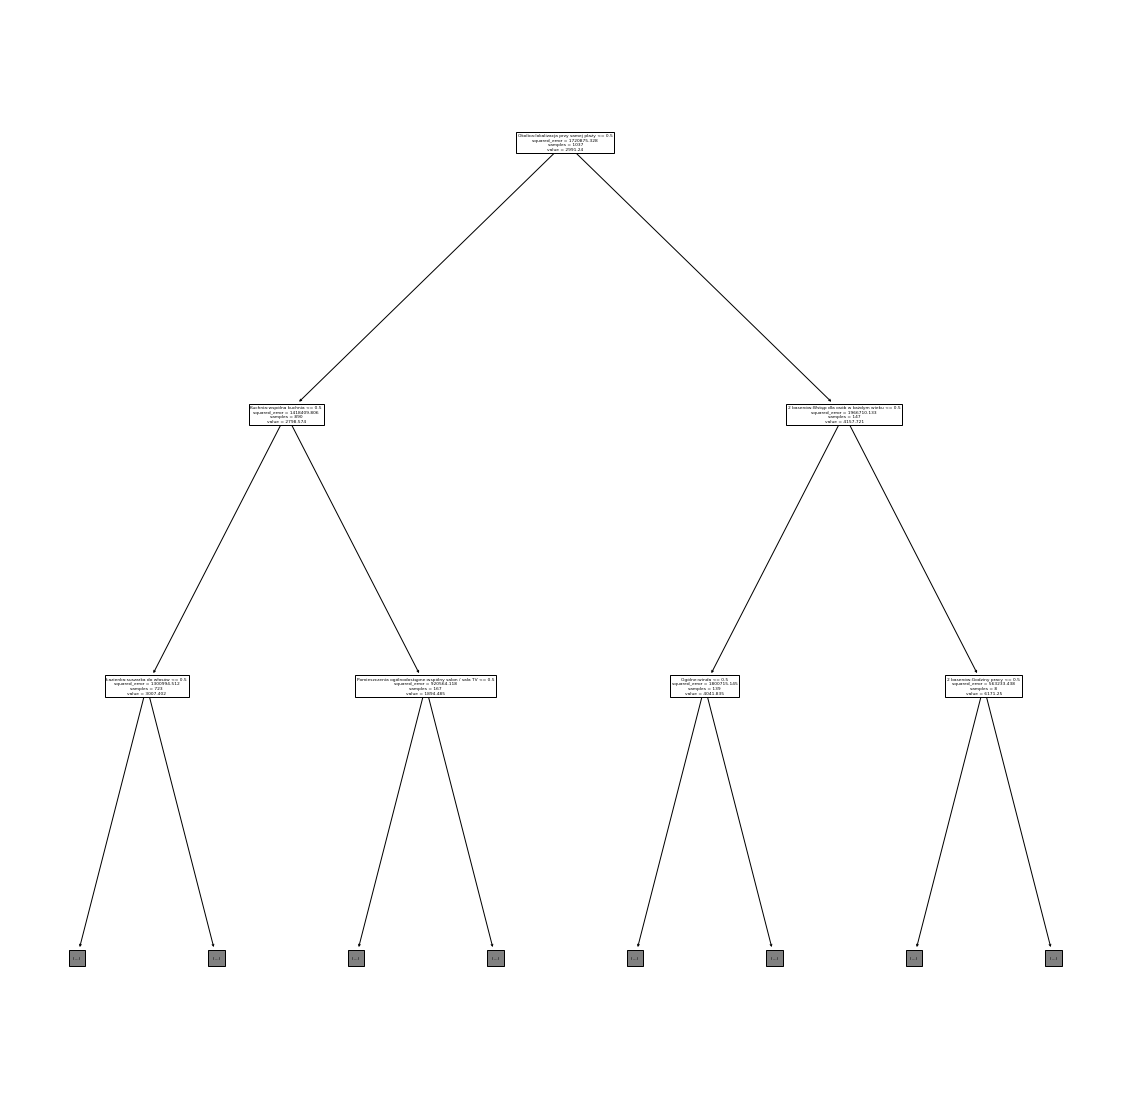

In [88]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(DTR, feature_names=X.columns,max_depth=2,filled=False)

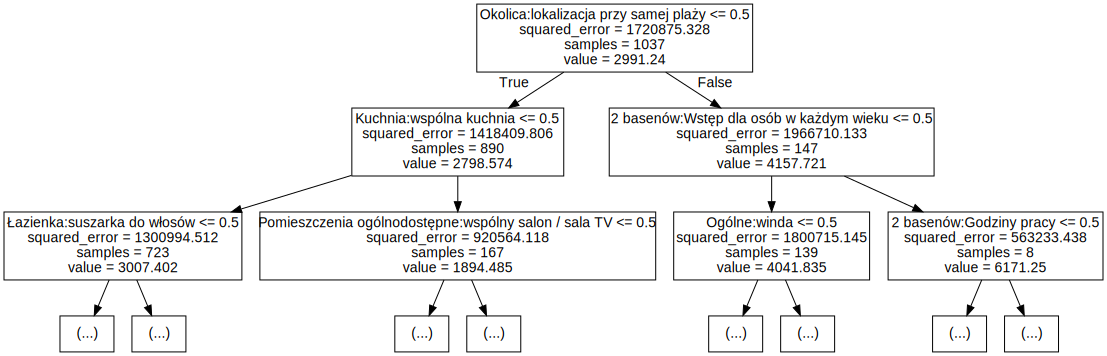

In [89]:
import graphviz

dot_data = tree.export_graphviz(DTR, out_file=None,feature_names=X.columns, max_depth=2)
graph = graphviz.Source(dot_data, format='png')
graph

In [90]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'r2 score {r2_score(y_test, predictons)}')
print(f'mean square {mean_squared_error(y_test, predictons)}')

r2 score 0.34505296967007537
mean square 1294186.2111337688


In [91]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(random_state=0)
RFR.fit(X_train, y_train)
predictons = RFR.predict(X_test)

In [92]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'r2 score {r2_score(y_test, predictons)}')
print(f'mean square {mean_squared_error(y_test, predictons)}')

r2 score 0.5319063093444182
mean square 924960.9081516141


In [93]:
#y_and_pred_array = [np.array(y_test),predictons]
#y_and_pred_array.sort(key= lambda x: x[0])
zipped = zip(np.array(y_test),predictons)
sorted_pairs = sorted(zipped)
tuples = zip(*sorted_pairs)
sorted_y_test, sorted_pred = [ list(tuple) for tuple in  tuples]


In [94]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    y = sorted_y_test,
    name = 'Real value'
))
fig.add_trace(go.Scatter(
    y = sorted_pred,
    name = 'Prediction'
))

fig.update_layout(
    title="Plot Title",
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Legend Title",
)
fig.show()

In [95]:
sort = RFR.feature_importances_.argsort()
fig = px.bar(y=X.columns[sort], x=RFR.feature_importances_[sort], height=600, title='Wykres miary ważności atrybutów')
fig.update_layout(xaxis_title='wartość',yaxis_title='atrybuty')
fig.show()

In [96]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

LCV = LassoCV(alphas=np.arange(0,1, 0.01), cv=cv, n_jobs=-1)

LCV.fit(X_train,y_train)

alpha_best_fold = LCV.alpha_
print(f'alpha: {LCV.alpha_}')

c:\Users\manar\anaconda3\envs\PAD\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1089821.7284111977, tolerance: 166469.82851789924

c:\Users\manar\anaconda3\envs\PAD\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 183678.1429953575, tolerance: 158264.71504523046

c:\Users\manar\anaconda3\envs\PAD\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1745809.5189546943, tolerance: 166469.82851789924

c:\Users\manar\anaconda3\envs\PAD\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iteration

alpha: 0.99


c:\Users\manar\anaconda3\envs\PAD\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 72528192.44003111, tolerance: 158354.25550449683

c:\Users\manar\anaconda3\envs\PAD\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning:

Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.

c:\Users\manar\anaconda3\envs\PAD\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 160179430.25221896, tolerance: 158354.25550449683



In [97]:
from sklearn.linear_model import Lasso

LS = Lasso(alpha=alpha_best_fold)

LS.fit(X_train,y_train)

predictons = LS.predict(X_test)

In [98]:
print(f'r2 score {r2_score(y_test, predictons)}')
print(f'mean square {mean_squared_error(y_test, predictons)}')

r2 score 0.4429925110407942
mean square 1100656.0505299424


In [99]:
import operator
coef_list = list(zip(LS.feature_names_in_ , LS.coef_))
coef_list_sorted = sorted(coef_list, key = operator.itemgetter(1), reverse=False)
coef_list_sorted

feature_name , feature_value = zip(*coef_list_sorted)

In [100]:
fig = px.bar(y=feature_name, x=feature_value, height=600, title='Wykres miary ważności atrybutów')
fig.update_layout(xaxis_title='wartość',yaxis_title='atrybuty')
fig.show()

In [101]:
df.columns

Index(['hotel_name', 'hotel_city', 'hotel_price', 'Personel', 'Udogodnienia',
       'Czystość', 'Komfort', 'Stosunek jakości do ceny', 'Lokalizacja',
       'Bezpłatne WiFi',
       ...
       'Odkryty basen:płotek wokół basenu',
       'Odkryty basen:basen z podgrzewaną wodą',
       'Usługi dla rodzin i oferta rozrywkowa:wózki dziecięce',
       'Odkryty basen:brodzik', '3 basenów:Sezonowy',
       'Rekreacja:wieczór filmowy\nPoza obiektem\nDodatkowa opłata',
       'Usługi:wymiana walut', 'Widok:widok na jezioro',
       'Rekreacja:bezpłatne rowery', 'Usługi:wózki dziecięce'],
      dtype='object', length=485)

In [102]:
df = df_copy
df

,hotel_name,hotel_city,hotel_price,Personel,Udogodnienia,Czystość,Komfort,Stosunek jakości do ceny,Lokalizacja,Bezpłatne WiFi,...,Usługi:prasa do spodni,Usługi:usługi konsjerża,Rekreacja:solarium\nDodatkowa opłata,Basen – odkryty (dla dzieci):ręczniki kąpielowe/plażowe,Basen – odkryty (dla dzieci):zabawki do wody,Basen – odkryty (dla dzieci):basen bez krawędzi,Rekreacja:wieczory tematyczne z kolacją\nPoza obiektem,Rekreacja:kasyno,Okolica:prywatna plaża\nDodatkowa opłata,Odkryty basen:Basen na dachu
0,Pokoje Gościnne Przy Molo,Gdynia,3524,9.2,8.4,8.8,8.4,8.3,9.6,8.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aparthotel Square - By The Sea,Gdynia,3263,9.4,9.3,9.6,9.7,9.3,9.5,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Villa Magna,Gdynia,2457,9.5,9.0,9.0,8.9,9.0,8.4,8.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apartamenty Andrzejczyk - Świętojańska 96,Gdynia,2017,9.4,8.7,8.8,8.9,8.7,9.5,9.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Redłowska Kaskada D39,Gdynia,2059,9.2,9.6,10.0,9.6,9.6,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,Turkusowy Zakątek,Międzyzdroje,4153,8.6,7.7,8.4,7.9,7.9,7.7,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1632,MojeMiędzyzdroje LU 8B - Luksusowy apartament ...,Międzyzdroje,5058,10.0,10.0,10.0,10.0,10.0,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1633,Rent like home - Prima 34,Międzyzdroje,6655,9.3,9.5,9.1,9.1,9.1,8.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1634,"Apartament w centrum ""Jagoda""przy Placu Neptuna",Międzyzdroje,5174,7.2,6.3,6.3,6.3,6.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df = df.fillna(0)
cattegory = []
for col in df.columns:
    if(col.split(':')[0] not in cattegory):
        print(col.split(':')[0])
        cattegory.append(col.split(':')[0])
print(len(cattegory))

hotel_name
hotel_city
hotel_price
Personel
Udogodnienia
Czystość
Komfort
Stosunek jakości do ceny
Lokalizacja
Bezpłatne WiFi
Łazienka
Sypialnia
Okolica
Kuchnia
Udogodnienia w pokoju
Salon
Media/Technologia
Parking
Bezpieczeństwo
Ogólne
Języki
Usługi recepcji
Udogodnienia dla niepełnosprawnych
Różne
Posiłki i napoje
Okolica i widok
Rekreacja
Cechy budynku
Sklepy
Transport
Usługi dla rodzin i oferta rozrywkowa
Usługi sprzątania
Zaplecze biznesowe
Zaplecze odnowy biologicznej
Widok
Kryty basen
Centrum wellness
Usługi dodatkowe
Usługi
Basen i odnowa biologiczna
Pomieszczenia ogólnodostępne
2 basenów
Odkryty basen
3 basenów
Basen – odkryty (dla dzieci)
45


In [104]:
def Set_One(number):
    if(number > 0):
        number = 1
    return number

In [105]:
def Apply_Rule(df:pd.DataFrame, categorys):
    for cat in categorys:
        df[cat] = df[cat].apply(Set_One)

In [106]:
cattegory_must_have = ['hotel_name','hotel_city','hotel_price','Personel','Udogodnienia','Czystość','Komfort','Stosunek jakości do ceny','Lokalizacja','Bezpłatne WiFi']
def Choose_Series(df:pd.DataFrame, cattegory_remove):
    cattegory_to_merge = []
    for col in df.columns:
        if(col not in cattegory_remove):
            if(col.split(':')[0] not in cattegory_to_merge):
                cattegory_to_merge.append(col.split(':')[0])
    return cattegory_to_merge

In [107]:
def Make_DF_Count_Facilities(df:pd.DataFrame, cattegory_must_have):
    df_counted = pd.DataFrame()
    cattegory_to_merge = Choose_Series(df, cattegory_must_have)
    
    for col in cattegory_must_have:
        df_counted[col] = df[col]
    for col in cattegory_to_merge:
        df_counted[col] = 0
    merge_dict = {x:[] for x in cattegory_to_merge}
    
    for col in df:
        col_categoty = col.split(':')[0]
        if col_categoty in cattegory_to_merge:
            merge_dict[col_categoty].append(col)
    for cattegory in cattegory_to_merge:
        for x in merge_dict[cattegory]:
            df_counted[cattegory] += df[x]
    
    #print(merge_dict)
    return df_counted

df = Make_DF_Count_Facilities(df, cattegory_must_have)
category_to_merge =  Choose_Series(df,cattegory_must_have)
Apply_Rule(df, category_to_merge)
df

,hotel_name,hotel_city,hotel_price,Personel,Udogodnienia,Czystość,Komfort,Stosunek jakości do ceny,Lokalizacja,Bezpłatne WiFi,...,Kryty basen,Centrum wellness,Usługi dodatkowe,Usługi,Basen i odnowa biologiczna,Pomieszczenia ogólnodostępne,2 basenów,Odkryty basen,3 basenów,Basen – odkryty (dla dzieci)
0,Pokoje Gościnne Przy Molo,Gdynia,3524,9.2,8.4,8.8,8.4,8.3,9.6,8.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aparthotel Square - By The Sea,Gdynia,3263,9.4,9.3,9.6,9.7,9.3,9.5,9.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Villa Magna,Gdynia,2457,9.5,9.0,9.0,8.9,9.0,8.4,8.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Apartamenty Andrzejczyk - Świętojańska 96,Gdynia,2017,9.4,8.7,8.8,8.9,8.7,9.5,9.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Redłowska Kaskada D39,Gdynia,2059,9.2,9.6,10.0,9.6,9.6,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,Turkusowy Zakątek,Międzyzdroje,4153,8.6,7.7,8.4,7.9,7.9,7.7,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1632,MojeMiędzyzdroje LU 8B - Luksusowy apartament ...,Międzyzdroje,5058,10.0,10.0,10.0,10.0,10.0,10.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1633,Rent like home - Prima 34,Międzyzdroje,6655,9.3,9.5,9.1,9.1,9.1,8.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1634,"Apartament w centrum ""Jagoda""przy Placu Neptuna",Międzyzdroje,5174,7.2,6.3,6.3,6.3,6.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
df_without_name = df.drop(columns=['hotel_name','hotel_city'])
y = df_without_name['hotel_price']
X = df_without_name.drop(columns=['hotel_price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [109]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(random_state=0,max_depth=4)
DTR.fit(X_train, y_train)
predictons = DTR.predict(X_test)

In [110]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'r2 score {r2_score(y_test, predictons)}')
print(f'mean square {mean_squared_error(y_test, predictons)}')

r2 score 0.32082325977007353
mean square 1067276.551069815


In [111]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(random_state=0)
RFR.fit(X_train, y_train)
predictons = RFR.predict(X_test)

In [112]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'r2 score {r2_score(y_test, predictons)}')
print(f'mean square {mean_squared_error(y_test, predictons)}')

r2 score 0.37634169862956746
mean square 980033.3867549099


In [113]:
sort = RFR.feature_importances_.argsort()
fig = px.bar(y=X.columns[sort], x=RFR.feature_importances_[sort], height=600, title='Wykres miary ważności atrybutów')
fig.update_layout(xaxis_title='wartość',yaxis_title='atrybuty')
fig.show()